In [ ]:
import h5py
from google.colab import files
import torch
import numpy as np
import time
from sklearn.manifold import TSNE
import plotly.express as px
from torch.utils.data import TensorDataset
from sklearn import preprocessing

In [ ]:
files.upload()

Saving vggish_features_labels.hdf5 to vggish_features_labels.hdf5


In [ ]:
with h5py.File('/content/vggish_features_labels.hdf5', 'r') as f:
  # file1 = f.get("data")
  data_file = np.array(f.get("data")).astype(float)

In [ ]:
print(data_file.shape)
print(type(data_file))
print(data_file[0][0])
print(min(data_file[0]))
print(max(data_file[0]))

(7077, 513)
<class 'numpy.ndarray'>
166.0
0.0
255.0


In [ ]:
# features = preprocessing.normalize(data_file[:,:-1])
scaler = preprocessing.MinMaxScaler(feature_range=(-1, 1))
features = scaler.fit_transform(data_file[:,:-1])
print("features", features.shape)
print("features", type(features))
print("value",features[0][0])
print("min", min(features[0]))
print("max",max(features[0]))
labels = data_file[:,-1].astype(int)
print("labels", labels.shape)
print("labels", labels[0])

features (7077, 512)
features <class 'numpy.ndarray'>
value -0.1428571428571428
min -1.0
max 1.0
labels (7077,)
labels 2


In [ ]:
dataset = TensorDataset( torch.Tensor(features), torch.Tensor(labels) )

In [ ]:
x, y = next(enumerate(dataset))
print(x, y)

0 (tensor([-0.1429,  0.1525,  0.1915,  0.4756,  1.0000, -0.4574, -0.2808,  0.6500,
         1.0000, -0.1333, -0.0745, -0.3961,  1.0000,  0.1529, -1.0000, -0.8902,
         0.2706, -0.4510,  0.5922,  0.3490, -0.9294,  0.6960, -0.1922,  0.3725,
         0.6627, -1.0000,  0.7569,  0.5373,  0.3412, -0.0667,  0.8118,  0.2627,
        -0.7412, -0.0902, -0.8980, -0.2314,  0.2392,  0.7569,  0.9451,  0.2863,
        -0.5373,  1.0000,  0.2784, -0.9216, -0.2314, -0.4431, -0.9529, -0.8275,
         0.4902,  1.0000, -0.6627, -0.0824,  1.0000,  1.0000, -1.0000, -0.6000,
        -0.5059, -1.0000, -1.0000,  0.5922,  0.2000, -1.0000, -0.4431,  0.1686,
         0.9059,  0.8667,  0.5922,  0.3725,  1.0000,  0.2784, -0.6706,  1.0000,
         0.9373, -1.0000,  0.2706, -1.0000, -0.6392, -1.0000,  0.5294,  1.0000,
         0.7333,  1.0000, -0.1529, -1.0000, -1.0000,  1.0000,  1.0000,  1.0000,
         0.8353, -0.1529, -1.0000, -1.0000,  1.0000,  1.0000,  0.2784,  1.0000,
         0.8118, -1.0000,  1.0000,  0

In [ ]:
start_time_tsne = time.time()

tsne = TSNE(n_components=2,random_state=42)
tsne_results = tsne.fit_transform(features)

fig = px.scatter(
        tsne_results, x=0, y=1,
        color=labels.astype(str),
        labels={'0': 'tsne-2d-one', '1': 'tsne-2d-two'}
      )
fig.show()

print('Total Time: %.2f min' % ((time.time() - start_time_tsne)/60))

Total Time: 1.19 min


In [ ]:
start_time_tsne = time.time()

tsne = TSNE(n_components=3,random_state=42)
tsne_results = tsne.fit_transform(features)

fig = px.scatter_3d(
        tsne_results, x=0, y=1, z=2,
        color=labels.astype(str),
        labels={'0': 'tsne-one', '1': 'tsne-two', '2': 'tsne-three'}
      )
fig.show()

print('Total Time: %.2f min' % ((time.time() - start_time_tsne)/60))

Total Time: 3.81 min


In [ ]:
!pip install import-ipynb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.6 MB/s eta 0:00:00


In [ ]:
import import_ipynb
import os
from google.colab import files
from importlib import reload
if not os.path.exists("/content/Model_VAE.ipynb"): files.upload()
import Model_VAE as m_vae

if not os.path.exists("/content/Model_CVAE.ipynb"): files.upload()
import Model_CVAE as m_cvae

import torch
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision import transforms
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox, TextArea
import pandas as pd
from tqdm import tqdm
import re as regex
import plotly.express as px

Saving Model_CVAE.ipynb to Model_CVAE.ipynb
Saving Model_VAE.ipynb to Model_VAE.ipynb
importing Jupyter notebook from Model_VAE.ipynb
importing Jupyter notebook from Model_CVAE.ipynb


In [ ]:
import Model_VAE as m_vae
reload(m_vae)
import Model_CVAE as m_cvae
reload(m_cvae)

importing Jupyter notebook from Model_VAE.ipynb
importing Jupyter notebook from Model_CVAE.ipynb


<module 'Model_CVAE' from 'Model_CVAE.ipynb'>

In [ ]:
### SETTINGS

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print('Device:', device)

# Hyperparameters
random_seed = 0
learning_rate = 0.0001
# learning_rate = 0.0001
num_epochs = 50
batch_size = 8

# Architecture
num_classes = 10
num_features = 512
# num_hidden_1 = 500
# num_hidden_1 = 512
num_hidden_1 = 512
# num_latent = 35
num_latent = 512

torch.manual_seed(random_seed)  # garantizar repetibilidad
# train data
data = DataLoader(
        dataset,
        batch_size = batch_size,
        shuffle = False # importante: para obtener resultados similares al re-ejecutar
      )

Device: cuda:0


In [ ]:
# models
modelVAE = m_vae.VariationalAutoencoder(
              latent_dims= num_latent,
              num_features= num_features,
              num_hidden_layers= num_hidden_1
            )
modelVAE = modelVAE.to(device.type)
print("VAE ready")

modelCVAE = m_cvae.ConditionalVariationalAutoencoder(
              latent_dims= num_latent,
              num_features= num_features,
              num_hidden_layers= num_hidden_1,
              num_classes= num_classes
            )
modelCVAE = modelCVAE.to(device.type)
print("CVAE ready")

Device: cuda:0
VAE ready
CVAE ready


In [ ]:
def identifyNet(model):
  cvae = False
  model_name = str(type(model))
  result = regex.search(r"'(.*?)'", model_name)
  model_name = result.group(1)
  if model_name.__contains__('Model_CVAE'):
    print('model CVAE')
    cvae = True
  else:
    print('model VAE')
  return cvae, model_name

In [ ]:
def to_onehot(labels, num_classes):
  # binariza las etiquetas, es decir convierte las etiquetas de clase en columnas y por fila, asigna un 1 en la columna que cumpla con la etiqueta
  labels_onehot = torch.zeros(labels.size()[0], num_classes).to(device)
  labels_onehot.scatter_(1, labels.view(-1, 1), 1)
  return labels_onehot

## training
def train(model, data, num_epochs=20, kl_version=2):
  start_time = time.time()
  optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
  losses = np.empty((0,3))
  cvae, model_name = identifyNet(model)

  for epoch in range(num_epochs):
    loss_epoch = np.empty((0,3))
    for batch_idx, (features, labels) in enumerate(data):

      features = features.to(device)
      targets = labels.type(torch.int64).to(device)

      optimizer.zero_grad() #importante antes de usar modelo

      if cvae:
        decoded = model(features, targets, kl_version) # Training CVAE
        x_con = torch.cat((features, to_onehot(targets, num_classes)), dim=1)
        kl_divergence = model.encoder.kl_divergence
        pixelwise = torch.nn.functional.binary_cross_entropy(decoded, x_con, reduction='sum')
      else:
        decoded = model(features) # Training VAE'
        kl_divergence = model.encoder.kl_divergence
        pixelwise = ((features - decoded)**2).mean()

      cost = kl_divergence + pixelwise # cost = reconstruction loss + Kullback-Leibler divergence
      ### update model params
      cost.backward()
      optimizer.step()
      # save cost/loss
      loss_epoch = np.append(loss_epoch, [[cost.item(), kl_divergence.item(), pixelwise.item()]], axis=0)

      ### logging progress
      if not batch_idx % num_epochs:
        print('Epoch: %03d/%03d | Batch %03d/%03d | kl: %.4f + pw: %.4f = cost: %.4f | KL v%02d'
              %(epoch+1, num_epochs, batch_idx, len(data.dataset)/batch_size, kl_divergence, pixelwise, cost, kl_version))

    print('Time elapsed: %.2f min' % ((time.time() - start_time)/60))
    # averange for loss by epoch
    losses = np.append(losses, [[np.mean(loss_epoch[:,0]), np.mean(loss_epoch[:,1]), np.mean(loss_epoch[:,2])]], axis=0)

  print('Total Training Time: %.2f min' % ((time.time() - start_time)/60))
  return model, losses


In [ ]:
def getTrainedLatentVectorAndLabels(trained_model, data, kl_version):
  start_time_pandas = time.time()

  encoded_samples = np.empty([0, num_latent])
  labels = np.empty([0,1])
  input_imgs = np.empty([0, num_features])

  cvae, model_name = identifyNet(trained_model)

  for features, targets in tqdm(data):
    features = features.to(device)
    targets = targets.type(torch.int64).to(device)

    trained_model.eval()

    with torch.no_grad():
      if cvae:
        encoded_img = trained_model.encoder(features, targets, device, kl_version)
      else:
        encoded_img = trained_model.encoder(features)

    labels = np.append(labels, targets.cpu().numpy())
    encoded_samples = np.append(encoded_samples, encoded_img.cpu().numpy(), axis=0)
    input_imgs = np.append(input_imgs, features.cpu().numpy(), axis=0)

  print('Total Time: %.2f min' % ((time.time() - start_time_pandas)/60))
  return encoded_samples, labels, input_imgs

In [ ]:
def plot_tsne2(trained_model, data, kl_version=2, frac=0, plot_v=1, file_name_to_save=''):

  encoded_samples, labels, img_inputs = getTrainedLatentVectorAndLabels(trained_model, data, kl_version)

  if frac > 0:
    encoded_samples_df = np.append(encoded_samples, labels[:,None], axis=1)
    encoded_samples_df = pd.DataFrame(encoded_samples_df, columns=[f'Variable {i}' for i in range(encoded_samples.shape[1])] + ['label'])
    encoded_samples_df = encoded_samples_df.groupby("label").sample(frac=frac, random_state=random_seed)

    encoded_samples = encoded_samples_df.drop(['label'],axis=1)
    labels = encoded_samples_df['label']

  print("ok load data")
  print("start build TSNE")

  start_time_tsne = time.time()
  coords = TSNE(n_components=2,random_state=random_seed).fit_transform(encoded_samples)
  classes = labels

  if plot_v == 1:
    fig = px.scatter(
        coords, x=0, y=1,
        color=classes.astype(str),
        labels={'0': 'tsne-2d-one', '1': 'tsne-2d-two'}
      )
    fig.show()
  else:
    fig, ax = plt.subplots(figsize=(15, 5))
    ax.set_title('t-SNE')
    plt.scatter(coords[:, 0], coords[:, 1], c=classes)
    plt.colorbar()
    for i in range(10):
      class_center = np.mean(coords[classes == i], axis=0)
      text = TextArea('{}'.format(i))
      ab = AnnotationBbox(text, class_center, xycoords='data', frameon=True)
      ax.add_artist(ab)
    if not file_name_to_save == "":
      plt.savefig("plot_tsne/"+file_name_to_save)
    else:
      plt.show()
  print('Total Time: %.2f min' % ((time.time() - start_time_tsne)/60))

In [ ]:
def plot_losses(val_loss):
  plt.figure(figsize=(15, 5))
  plt.plot(val_loss, label={"loss", "kl", "pw"})
  plt.legend(loc='best')
  plt.xlabel("epochs")
  plt.ylabel("loss")
  plt.show()

In [ ]:
# batch, (features, targets) = next(enumerate(dataset))
batch, (features, targets) = next(enumerate(data))
features = features.to(device)
# features = features.view(-1, 512).to(device.type)
# print(batch)
print(features.shape)
# print(targets)
decoded = modelVAE(features)
kl_divergence = modelVAE.encoder.kl_divergence
kl_divergence
# cost = ((features - decoded)**2).mean() + kl_divergence
# cost

torch.Size([8, 512])


tensor(7.6987, device='cuda:0', grad_fn=<MeanBackward0>)

# 10-Jul

## VAE

In [ ]:
trained_vae, losses_vae = train(modelVAE, data, num_epochs, kl_version=2)

model VAE
Epoch: 001/050 | Batch 000/884 | Cost: 7.7918 | KL v02
Epoch: 001/050 | Batch 050/884 | Cost: 0.1051 | KL v02
Epoch: 001/050 | Batch 100/884 | Cost: 0.0768 | KL v02
Epoch: 001/050 | Batch 150/884 | Cost: 0.0606 | KL v02
Epoch: 001/050 | Batch 200/884 | Cost: 0.0550 | KL v02
Epoch: 001/050 | Batch 250/884 | Cost: 0.0818 | KL v02
Epoch: 001/050 | Batch 300/884 | Cost: 0.0974 | KL v02
Epoch: 001/050 | Batch 350/884 | Cost: 0.0697 | KL v02
Epoch: 001/050 | Batch 400/884 | Cost: 0.0466 | KL v02
Epoch: 001/050 | Batch 450/884 | Cost: 0.0828 | KL v02
Epoch: 001/050 | Batch 500/884 | Cost: 0.0759 | KL v02
Epoch: 001/050 | Batch 550/884 | Cost: 0.0486 | KL v02
Epoch: 001/050 | Batch 600/884 | Cost: 0.0938 | KL v02
Epoch: 001/050 | Batch 650/884 | Cost: 0.0672 | KL v02
Epoch: 001/050 | Batch 700/884 | Cost: 0.0840 | KL v02
Epoch: 001/050 | Batch 750/884 | Cost: 0.0970 | KL v02
Epoch: 001/050 | Batch 800/884 | Cost: 0.0908 | KL v02
Epoch: 001/050 | Batch 850/884 | Cost: 0.0685 | KL v02


In [ ]:
modelVAE.encoder.hidden_1.weight.dtype

torch.float32

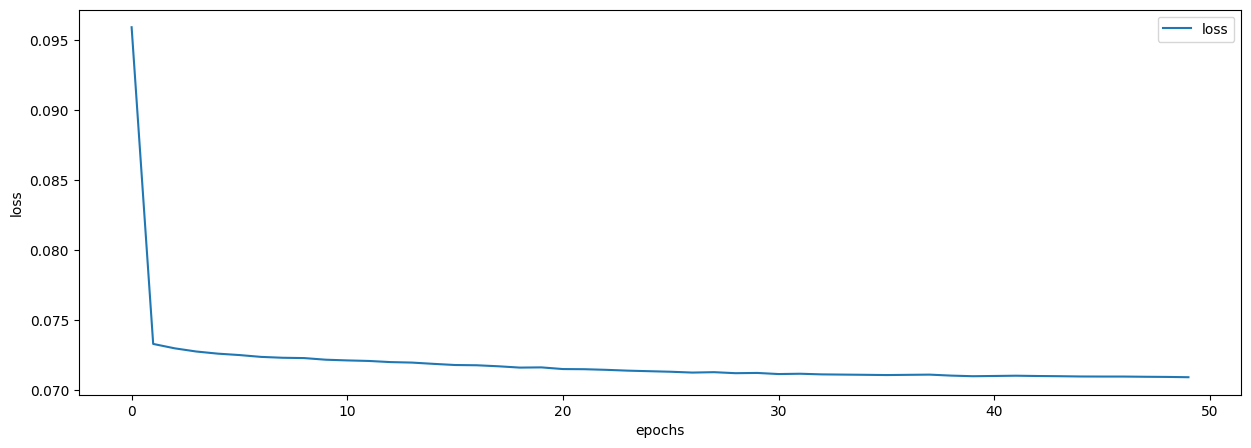

In [ ]:
plot_losses(losses_vae)

In [ ]:
plot_tsne2(trained_vae, data, kl_version=2, frac=0.3)

model VAE


100%|██████████| 885/885 [00:05<00:00, 152.71it/s]


Total Time: 0.10 min
ok load data
start build TSNE


Total Time: 0.34 min


## CVAE



In [ ]:
trained_cvae, losses_cvae = train(modelCVAE, data, num_epochs, kl_version=2)

model CVAE
Epoch: 001/050 | Batch 000/884 | Cost: 2992.3870 | KL v02
Epoch: 001/050 | Batch 050/884 | Cost: 2815.0005 | KL v02
Epoch: 001/050 | Batch 100/884 | Cost: 2724.8391 | KL v02
Epoch: 001/050 | Batch 150/884 | Cost: 2716.8018 | KL v02
Epoch: 001/050 | Batch 200/884 | Cost: 2547.1631 | KL v02
Epoch: 001/050 | Batch 250/884 | Cost: 2654.4094 | KL v02
Epoch: 001/050 | Batch 300/884 | Cost: 2666.0784 | KL v02
Epoch: 001/050 | Batch 350/884 | Cost: 2659.8672 | KL v02
Epoch: 001/050 | Batch 400/884 | Cost: 2544.4424 | KL v02
Epoch: 001/050 | Batch 450/884 | Cost: 2643.2693 | KL v02
Epoch: 001/050 | Batch 500/884 | Cost: 2526.3240 | KL v02
Epoch: 001/050 | Batch 550/884 | Cost: 2793.1074 | KL v02
Epoch: 001/050 | Batch 600/884 | Cost: 2734.4036 | KL v02
Epoch: 001/050 | Batch 650/884 | Cost: 2641.6868 | KL v02
Epoch: 001/050 | Batch 700/884 | Cost: 2640.2483 | KL v02
Epoch: 001/050 | Batch 750/884 | Cost: 2813.2019 | KL v02
Epoch: 001/050 | Batch 800/884 | Cost: 2556.3433 | KL v02
Epo

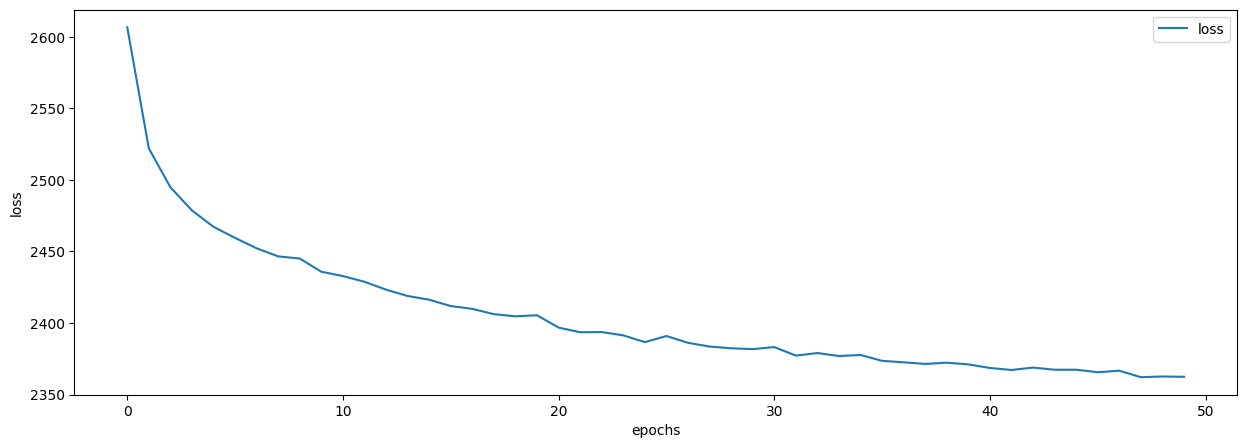

In [ ]:
plot_losses(losses_cvae)

In [ ]:
plot_tsne2(trained_cvae, data, kl_version=2, frac=0.3)

model CVAE


100%|██████████| 885/885 [00:06<00:00, 144.61it/s]


Total Time: 0.10 min
ok load data
start build TSNE


Total Time: 0.34 min


In [ ]:
# models
num_latent = 8
num_hidden_1 = 256
modelVAE2 = m_vae.VariationalAutoencoder(
              latent_dims= num_latent,
              num_features= num_features,
              num_hidden_layers= num_hidden_1
            )
modelVAE2 = modelVAE2.to(device.type)
print("VAE ready")

modelCVAE2 = m_cvae.ConditionalVariationalAutoencoder(
              latent_dims= num_latent,
              num_features= num_features,
              num_hidden_layers= num_hidden_1,
              num_classes= num_classes
            )
modelCVAE2 = modelCVAE2.to(device.type)
print("CVAE ready")

VAE ready
CVAE ready


## VAE

In [ ]:
trained_vae2, losses_vae2 = train(modelVAE2, data, num_epochs, kl_version=2)

model VAE
Epoch: 001/050 | Batch 000/884 | Cost: 0.2761 | KL v02
Epoch: 001/050 | Batch 050/884 | Cost: 0.0720 | KL v02
Epoch: 001/050 | Batch 100/884 | Cost: 0.0751 | KL v02
Epoch: 001/050 | Batch 150/884 | Cost: 0.0614 | KL v02
Epoch: 001/050 | Batch 200/884 | Cost: 0.0533 | KL v02
Epoch: 001/050 | Batch 250/884 | Cost: 0.0810 | KL v02
Epoch: 001/050 | Batch 300/884 | Cost: 0.0894 | KL v02
Epoch: 001/050 | Batch 350/884 | Cost: 0.0683 | KL v02
Epoch: 001/050 | Batch 400/884 | Cost: 0.0465 | KL v02
Epoch: 001/050 | Batch 450/884 | Cost: 0.0761 | KL v02
Epoch: 001/050 | Batch 500/884 | Cost: 0.0758 | KL v02
Epoch: 001/050 | Batch 550/884 | Cost: 0.0503 | KL v02
Epoch: 001/050 | Batch 600/884 | Cost: 0.0876 | KL v02
Epoch: 001/050 | Batch 650/884 | Cost: 0.0650 | KL v02
Epoch: 001/050 | Batch 700/884 | Cost: 0.0838 | KL v02
Epoch: 001/050 | Batch 750/884 | Cost: 0.0924 | KL v02
Epoch: 001/050 | Batch 800/884 | Cost: 0.0873 | KL v02
Epoch: 001/050 | Batch 850/884 | Cost: 0.0680 | KL v02


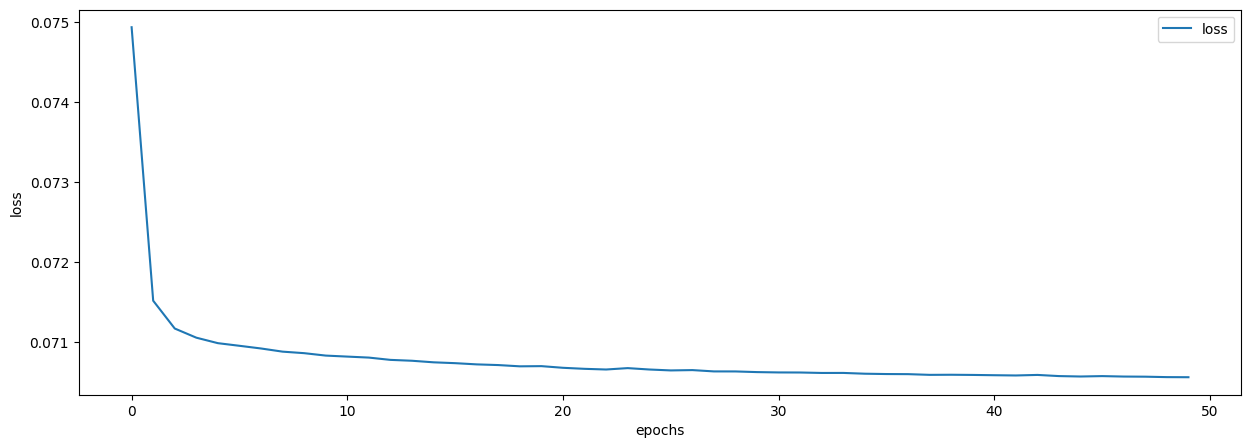

In [ ]:
plot_losses(losses_vae2)

In [ ]:
plot_tsne2(trained_vae2, data, kl_version=2, frac=0.3)

model VAE


100%|██████████| 885/885 [00:03<00:00, 274.73it/s]


Total Time: 0.05 min
ok load data
start build TSNE


Total Time: 0.27 min


## CVAE

In [ ]:
trained_cvae2, losses_cvae2 = train(modelCVAE2, data, num_epochs, kl_version=2)

model CVAE
Epoch: 001/050 | Batch 000/884 | Cost: 2908.0493 | KL v02
Epoch: 001/050 | Batch 050/884 | Cost: 2723.5632 | KL v02
Epoch: 001/050 | Batch 100/884 | Cost: 2641.8000 | KL v02
Epoch: 001/050 | Batch 150/884 | Cost: 2677.2471 | KL v02
Epoch: 001/050 | Batch 200/884 | Cost: 2479.4993 | KL v02
Epoch: 001/050 | Batch 250/884 | Cost: 2613.2434 | KL v02
Epoch: 001/050 | Batch 300/884 | Cost: 2537.6267 | KL v02
Epoch: 001/050 | Batch 350/884 | Cost: 2607.7500 | KL v02
Epoch: 001/050 | Batch 400/884 | Cost: 2466.7205 | KL v02
Epoch: 001/050 | Batch 450/884 | Cost: 2569.5098 | KL v02
Epoch: 001/050 | Batch 500/884 | Cost: 2445.1284 | KL v02
Epoch: 001/050 | Batch 550/884 | Cost: 2837.0730 | KL v02
Epoch: 001/050 | Batch 600/884 | Cost: 2581.1721 | KL v02
Epoch: 001/050 | Batch 650/884 | Cost: 2449.7639 | KL v02
Epoch: 001/050 | Batch 700/884 | Cost: 2473.6179 | KL v02
Epoch: 001/050 | Batch 750/884 | Cost: 2698.9519 | KL v02
Epoch: 001/050 | Batch 800/884 | Cost: 2451.6130 | KL v02
Epo

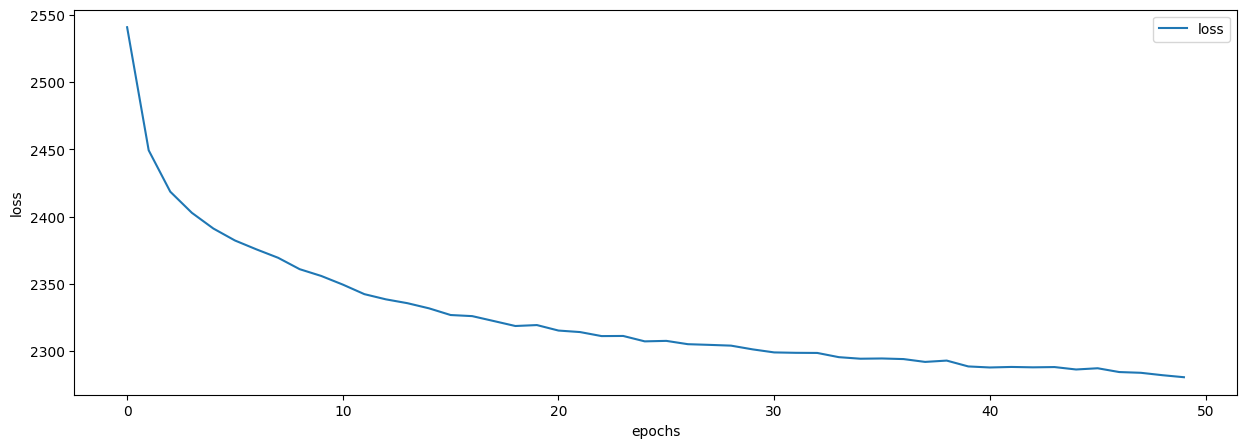

In [ ]:
plot_losses(losses_cvae2)

In [ ]:
plot_tsne2(trained_cvae2, data, kl_version=2, frac=0.3)

model CVAE


100%|██████████| 885/885 [00:03<00:00, 275.20it/s]


Total Time: 0.05 min
ok load data
start build TSNE


Total Time: 0.26 min


# 24-jul

## Adjusted learning rate and scale
* kl_version VAE
* learning rate 0.0001
* scale minmax -1 to 1

In [ ]:
# Hyperparameters
random_seed = 5
learning_rate = 0.0001
num_epochs = 50
batch_size = 8

# Architecture
num_classes = 10
num_features = 512
num_hidden = 512
num_latent = 512

torch.manual_seed(random_seed)  # garantizar repetibilidad
# train data
data = DataLoader( dataset,
        batch_size = batch_size,
        shuffle = False # importante: para obtener resultados similares al re-ejecutar
      )
# model
modelVAE = m_vae.VariationalAutoencoder(
              latent_dims= num_latent,
              num_features= num_features,
              num_hidden_layers= num_hidden
            )
modelVAE = modelVAE.to(device.type)

#train
trained_vae, losses_vae = modelVAE.train_fit(data, learning_rate, num_epochs)
print(losses_vae[num_epochs-1])
# print("kl:", losses_vae[9][1])
# print("pw:", losses_vae[9][2])
# print("cost",losses_vae[9][0])
print("avg cost",np.mean(losses_vae[:,0]))
print("min cost",min(losses_vae[:,0]))
print("max cost",max(losses_vae[:,0]))
print("std cost",np.std(losses_vae[:,0]))

Device: cuda:0
Epoch: 001/050 | Batch 000/884 | kl: 9.0058 + pw: 2223.8738 = cost: 2232.8796
Epoch: 001/050 | Batch 050/884 | kl: 70.8405 + pw: 1650.3132 = cost: 1721.1538
Epoch: 001/050 | Batch 100/884 | kl: 86.3900 + pw: 1299.6691 = cost: 1386.0591
Epoch: 001/050 | Batch 150/884 | kl: 43.0793 + pw: 1120.0189 = cost: 1163.0983
Epoch: 001/050 | Batch 200/884 | kl: 46.6988 + pw: 1130.7429 = cost: 1177.4418
Epoch: 001/050 | Batch 250/884 | kl: 27.8196 + pw: 1551.8813 = cost: 1579.7009
Epoch: 001/050 | Batch 300/884 | kl: 34.2740 + pw: 1506.3689 = cost: 1540.6428
Epoch: 001/050 | Batch 350/884 | kl: 23.4865 + pw: 1320.8967 = cost: 1344.3832
Epoch: 001/050 | Batch 400/884 | kl: 24.2677 + pw: 1132.3083 = cost: 1156.5760
Epoch: 001/050 | Batch 450/884 | kl: 23.5377 + pw: 1291.2574 = cost: 1314.7952
Epoch: 001/050 | Batch 500/884 | kl: 29.7603 + pw: 1340.4006 = cost: 1370.1609
Epoch: 001/050 | Batch 550/884 | kl: 18.6287 + pw: 893.7308 = cost: 912.3594
Epoch: 001/050 | Batch 600/884 | kl: 19.

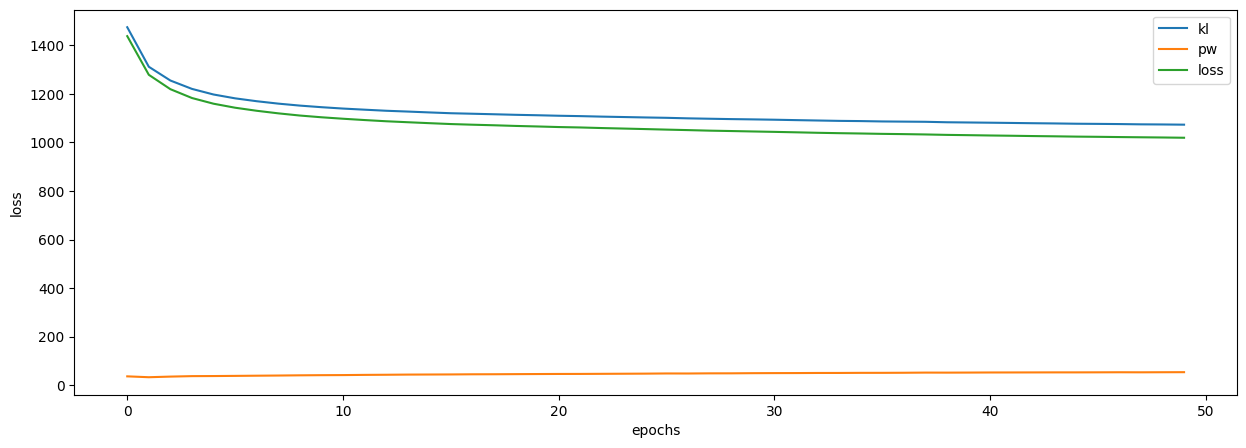

In [ ]:
plot_losses(losses_vae)

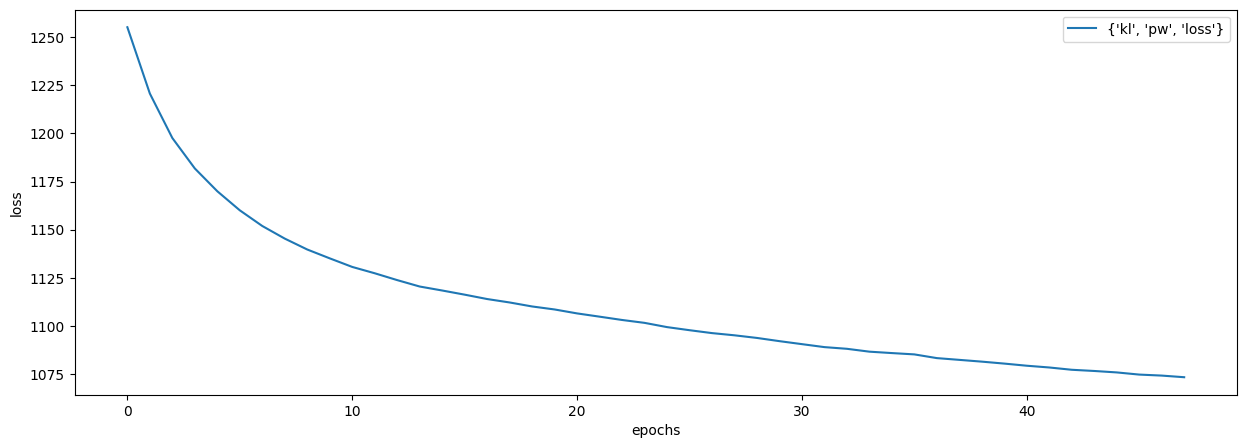

In [ ]:
plot_losses(losses_vae[2:,0])

In [ ]:
plot_tsne2(trained_vae, data, kl_version=1, frac=0.3)

model VAE


100%|██████████| 885/885 [00:06<00:00, 147.01it/s]


Total Time: 0.10 min
ok load data
start build TSNE


Total Time: 0.30 min


In [ ]:
# Hyperparameters
random_seed = 5
learning_rate = 0.0001
num_epochs = 20
batch_size = 8

# Architecture
num_classes = 10
num_features = 512
num_hidden = 512
num_latent = 512

torch.manual_seed(random_seed)  # garantizar repetibilidad
# train data
data = DataLoader( dataset,
        batch_size = batch_size,
        shuffle = False # importante: para obtener resultados similares al re-ejecutar
      )
# model
modelCVAE = m_cvae.ConditionalVariationalAutoencoder(
              latent_dims= num_latent,
              num_features= num_features,
              num_hidden_layers= num_hidden,
              num_classes = num_classes
            )
modelCVAE = modelCVAE.to(device.type)

#train
trained_cvae, losses_cvae = train(modelCVAE, data, num_epochs, kl_version=1)
print(losses_cvae[num_epochs-1])
print("avg cost",np.mean(losses_cvae[:,0]))
print("min cost",min(losses_cvae[:,0]))
print("max cost",max(losses_cvae[:,0]))
print("std cost",np.std(losses_cvae[:,0]))

model CVAE
Epoch: 001/020 | Batch 000/884 | kl: 7.3931 + pw: 2915.4744 = cost: 2922.8674 | KL v01
Epoch: 001/020 | Batch 020/884 | kl: 13.9980 + pw: 2459.4573 = cost: 2473.4553 | KL v01
Epoch: 001/020 | Batch 040/884 | kl: 51.1237 + pw: 1583.3171 = cost: 1634.4409 | KL v01
Epoch: 001/020 | Batch 060/884 | kl: 360.5960 + pw: -1826.2625 = cost: -1465.6665 | KL v01
Epoch: 001/020 | Batch 080/884 | kl: 3598.1938 + pw: -25408.1758 = cost: -21809.9824 | KL v01
Epoch: 001/020 | Batch 100/884 | kl: 1912.6727 + pw: -15235.5684 = cost: -13322.8955 | KL v01
Epoch: 001/020 | Batch 120/884 | kl: 926.4337 + pw: -16274.8730 = cost: -15348.4395 | KL v01
Epoch: 001/020 | Batch 140/884 | kl: 1094.3123 + pw: -21882.6328 = cost: -20788.3203 | KL v01
Epoch: 001/020 | Batch 160/884 | kl: 747.0845 + pw: -16816.5293 = cost: -16069.4443 | KL v01
Epoch: 001/020 | Batch 180/884 | kl: 1299.0291 + pw: -31357.2617 = cost: -30058.2324 | KL v01
Epoch: 001/020 | Batch 200/884 | kl: 658.2868 + pw: -22590.7559 = cost: -

In [ ]:
print(losses_cvae[num_epochs-1])
print("avg cost",np.mean(losses_cvae[:,0]))
print("min cost",min(losses_cvae[:,0]))
print("max cost",max(losses_cvae[:,0]))
print("std cost",np.std(losses_cvae[:,0]))

[-47810.37190148    319.0898137  -48129.46164151]
avg cost -39403.85445748194
min cost -47810.37190148305
max cost -17785.19717565849
std cost 7752.056373137493


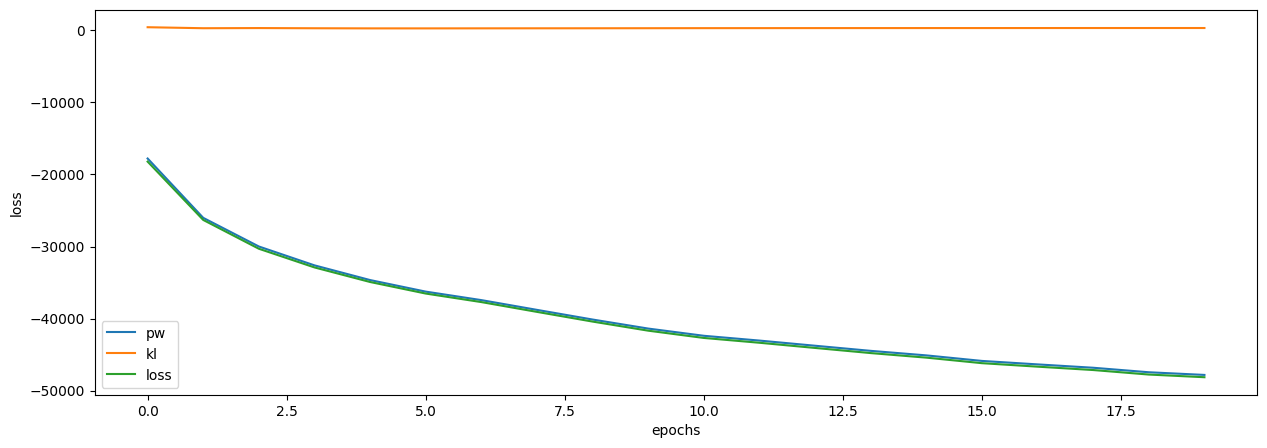

In [ ]:
plot_losses(losses_cvae)

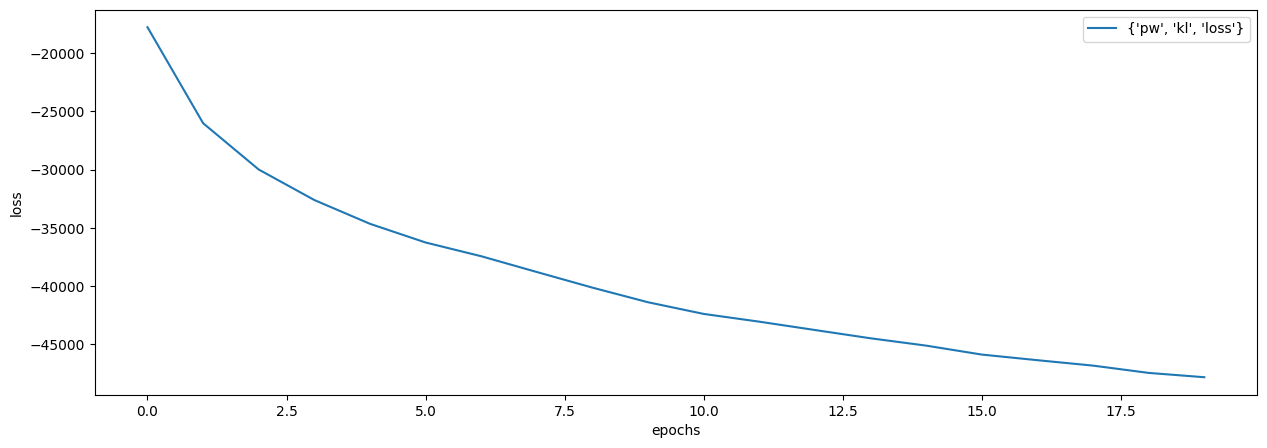

In [ ]:
plot_losses(losses_cvae[:,0])

In [ ]:
plot_tsne2(trained_cvae, data, kl_version=1, frac=0.3)

model CVAE


100%|██████████| 885/885 [00:06<00:00, 138.02it/s]


Total Time: 0.11 min
ok load data
start build TSNE


Total Time: 0.29 min


In [ ]:
# Hyperparameters
random_seed = 5
learning_rate = 0.0001
num_epochs = 20
batch_size = 8

# Architecture
num_classes = 10
num_features = 512
num_hidden = 512
num_latent = 512

torch.manual_seed(random_seed)  # garantizar repetibilidad
# train data
data = DataLoader( dataset,
        batch_size = batch_size,
        shuffle = False # importante: para obtener resultados similares al re-ejecutar
      )
# model
modelCVAE = m_cvae.ConditionalVariationalAutoencoder(
              latent_dims= num_latent,
              num_features= num_features,
              num_hidden_layers= num_hidden,
              num_classes = num_classes
            )
modelCVAE = modelCVAE.to(device.type)

#train
trained_cvae, losses_cvae = train(modelCVAE, data, num_epochs, kl_version=2)
print(losses_cvae[num_epochs-1])
print("avg cost",np.mean(losses_cvae[:,0]))
print("min cost",min(losses_cvae[:,0]))
print("max cost",max(losses_cvae[:,0]))
print("std cost",np.std(losses_cvae[:,0]))

model CVAE
Epoch: 001/020 | Batch 000/884 | kl: 59.1448 + pw: 2915.4744 = cost: 2974.6191 | KL v02
Epoch: 001/020 | Batch 020/884 | kl: 40.5096 + pw: 2514.6021 = cost: 2555.1118 | KL v02
Epoch: 001/020 | Batch 040/884 | kl: 44.4337 + pw: 2091.6743 = cost: 2136.1082 | KL v02
Epoch: 001/020 | Batch 060/884 | kl: 214.3185 + pw: 1190.0366 = cost: 1404.3552 | KL v02
Epoch: 001/020 | Batch 080/884 | kl: 1836.6272 + pw: -2594.3950 = cost: -757.7678 | KL v02
Epoch: 001/020 | Batch 100/884 | kl: 2156.2769 + pw: -3990.8936 = cost: -1834.6167 | KL v02
Epoch: 001/020 | Batch 120/884 | kl: 2787.4878 + pw: -13428.2393 = cost: -10640.7520 | KL v02
Epoch: 001/020 | Batch 140/884 | kl: 3093.4539 + pw: -21343.9727 = cost: -18250.5195 | KL v02
Epoch: 001/020 | Batch 160/884 | kl: 1593.0073 + pw: -15126.3496 = cost: -13533.3418 | KL v02
Epoch: 001/020 | Batch 180/884 | kl: 2400.6299 + pw: -27569.8867 = cost: -25169.2578 | KL v02
Epoch: 001/020 | Batch 200/884 | kl: 1344.8229 + pw: -21187.6973 = cost: -198

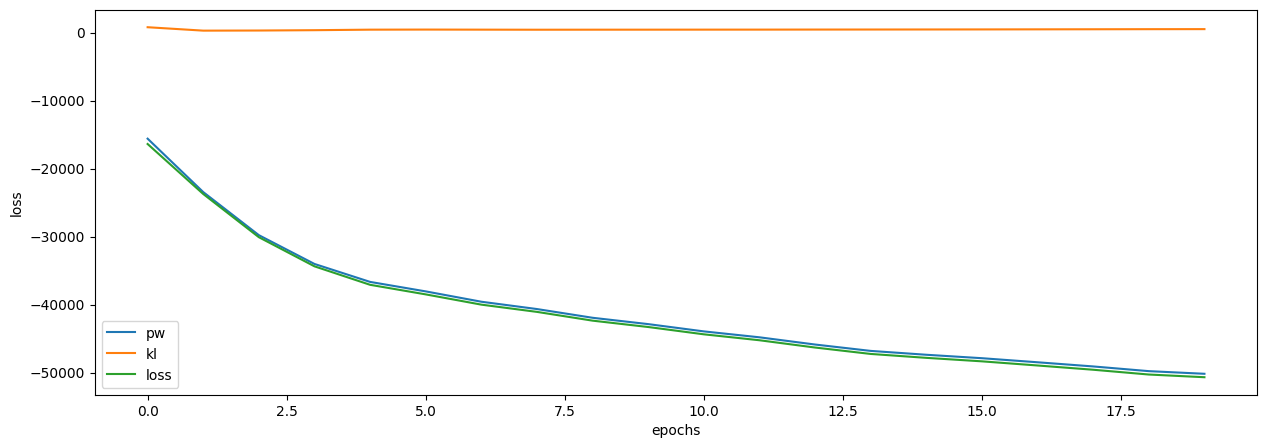

In [ ]:
plot_losses(losses_cvae)

In [ ]:
plot_tsne2(trained_cvae, data, kl_version=1, frac=0.3)

model CVAE


100%|██████████| 885/885 [00:05<00:00, 153.26it/s]


Total Time: 0.10 min
ok load data
start build TSNE


Total Time: 0.31 min


## Save iterative plot TSNE

In [ ]:
max_num_latent = 8#201
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for latent in range(4, max_num_latent, 4):
  print(latent)

  # Hyperparameters
  random_seed = 5
  learning_rate = 0.0001
  num_epochs = 2
  batch_size = 8

  # Architecture
  num_classes = 10
  num_features = 512
  num_hidden = 256
  num_latent = latent
  torch.manual_seed(random_seed)  # garantizar repetibilidad

  # train data
  data = DataLoader( dataset, batch_size = batch_size,
          shuffle = False # importante: para obtener resultados similares al re-ejecutar
        )
  # model
  modelVAE = m_vae.VariationalAutoencoder(
                latent_dims= num_latent,
                num_features= num_features,
                num_hidden_layers= num_hidden
              )
  modelVAE = modelVAE.to(device.type)

  #train
  trained_vae, losses_vae = modelVAE.train_fit(data=data, learning_rate=learning_rate, num_epochs=num_epochs)
  plot_tsne2(trained_vae, data, kl_version=1, frac=0.3, plot_v=2, file_name_to_save='vae-lr[{}]-latent[{}].png'.format(learning_rate, latent))

## optuna

In [ ]:
!pip install optuna
import optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 9.0 MB/s eta 0:00:00


In [ ]:
def create_model(trial):
  params = {
    'latent_dims': trial.suggest_int('latent_dims', 4, 512),
    'num_features': 512,
    'num_hidden_layers': trial.suggest_int('num_hidden_layers', 8, 512)
  }
  modelVAE = m_vae.VariationalAutoencoder(**params).to(device)
  return modelVAE

In [ ]:
def objective(trial):
  model = create_model(trial)
  # lr = trial.suggest_loguniform("lr", 1e-5, 1e-1)
  params = {
    'data': data,
    'learning_rate': trial.suggest_float('learning_rate', 1e-5, 1e-2),
    'num_epochs': trial.suggest_int('num_epochs', 20, 100)
  }
  model, loss = model.train_fit(**params)
  return min(loss[:,0])

In [ ]:
data = DataLoader(dataset, batch_size = batch_size, shuffle = False)
study = optuna.create_study(direction="minimize")
study.optimize(objective)
print(study.best_params)

Output hidden; open in https://colab.research.google.com to view.

[I 2023-07-24 20:55:52,216] Trial 29 finished with value: 1019.6807276149254 and parameters: {'latent_dims': 46, 'num_hidden_layers': 198, 'learning_rate': 0.00029845739270564715, 'num_epochs': 93}. Best is trial 24 with value: 997.8565619689597.


[I 2023-07-24 20:38:51,527] Trial 24 finished with value: 997.8565619689597 and parameters: {'latent_dims': 154, 'num_hidden_layers': 506, 'learning_rate': 0.0003737843347158508, 'num_epochs': 91}. Best is trial 24 with value: 997.8565619689597.


In [ ]:
optuna.visualization.plot_optimization_history(study)

In [ ]:
optuna.visualization.plot_slice(study)